# Bitcoin Market Analysis
<p> This project will demonstrate the following skills: </p>
<ul>
    <li> Data importing </li>
    <li> Data visualization </li>
    <li> Data cleaning </li>
</ul>

## Introduction
<p> Bitcoin is an electronic cash system notable for its decentralized peer-to-peer distribution network. It was invented in 2008 by an unknown figure Satoshi Nakamoto. The first block of the chain, known as the *genesis block*, was mined on January 3rd 2009 by Nakamoto. On May 22nd 2010 the first documented purchase of two pizzas by Laszlo Hanyecz from Jeremy Sturdivant for 10,000 Bitcoin, which as of 12/16/2020 is equal to approximately $214,000,000. </p>

<p> Since March 2013 the US government has declared that Bitcoin money services businesses opperating exchanges and administration must register and obey legal obligations of the United States Department of the Treasury. In December 2013, the People's Bank of China prohibited use of bitcoins in financial institutions. A year later the Wikimedia Foundation began accepting donations in the form of Bitcoin. On 15 July 2017, the <a href = "https://en.wikipedia.org/wiki/SegWit">Segregated Witness</a> software upgrade was approved by the Bitcoin Foundation triggering a 50 percent price bump over the following week. China banned trading in Bitcoin on 1 Febuary 2018. Volume of bitcoin training in Chinese yuan fell from 90 percent in September 2017 to less than 1 percent in June 2018. </p>

<p> In 2018 several cryptocurrency exchanges were hacked including Coincheck, Bithumb, and Bancor. In total the first 6 months of 2018 resulted in theft of \\$ 761 million worth of cryptocurrencies. <p>



## Import packages and data

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt

# Set matplotlib asethetics 
%matplotlib inline
%config inlineBackend.figure_format = 'svg'
plt.style.use('fivethirtyeight')

# Import data
dec6 = pd.read_csv("datasets/coinmarketcap_06122017.csv")

# inspect data's shape
dec6.shape

(1326, 16)

There are 16 columns and 1326 rows.

In [2]:
# Inspect the columns
dec6.columns

Index(['Unnamed: 0', '24h_volume_usd', 'available_supply', 'id',
       'last_updated', 'market_cap_usd', 'max_supply', 'name',
       'percent_change_1h', 'percent_change_24h', 'percent_change_7d',
       'price_btc', 'price_usd', 'rank', 'symbol', 'total_supply'],
      dtype='object')

In [3]:
# Inspect the dataset
dec6.head()

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


Given that this dataset has several different types of cryptocurrencies we can compare the currencies using a bar graph. To do this, we need the ID column and a column to analyze.

In [4]:
# Analyze the market cap in USD
market_cap = dec6[["id", "market_cap_usd"]]

# Inspect the dataset by counting the values. NA values will not be shown with this method.
market_cap.count()

id                1326
market_cap_usd    1031
dtype: int64

There are 1326 different currencies, but only 1031 values for marketcap, that indicates approximately 300 NA values for market_cap_usd. Drop those NA values and recheck to for egality between id and market_cap_usd. 

In [5]:
# Drop missing rows
market_cap.dropna()

# Inspect the dataset counts
market_cap.count()

id                1326
market_cap_usd    1031
dtype: int64

The missing values are not NA values, therefore they likely do not have market capitalization I will remove them with a filtering query.

In [6]:
# Filter out the values with a query. Assign to market_cap.
market_cap = market_cap.query('market_cap_usd > 0')

# Inspect the dataset counts
market_cap.count()

id                1031
market_cap_usd    1031
dtype: int64

This method was successful. Now I want to plot the data, and will begin by looking at the percentage market cap for the top 10 currencies.

In [7]:
# Set the index to id
market_cap = market_cap.set_index('id')

Text(0.5, 0, '')

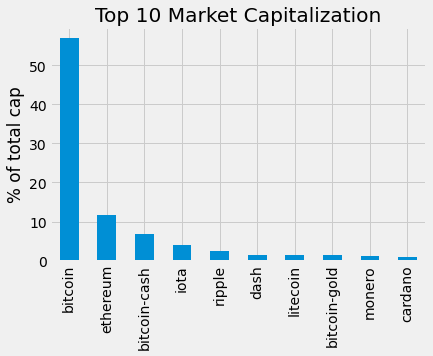

In [8]:
# Sort values by market cap
market_cap = market_cap.sort_values("market_cap_usd", ascending = False)

# Calculate the percentage market cap
cap_perc = market_cap.assign(market_cap_perc = 
                            lambda x: (x.market_cap_usd / market_cap.market_cap_usd.sum()) * 100)

# Select the top 10 cryptocurrencies
cap10 = cap_perc[:10]

# Declare the labels for the figure
CAP_TITLE = "Top 10 Market Capitalization"
CAP_YLABEL = '% of total cap'

# Plot market cap percent
ax = cap10.market_cap_perc.plot.bar(title = CAP_TITLE)
ax.set_ylabel(CAP_YLABEL)
ax.set_xlabel('')

Bitcoin has a dominating position in the cryptocurrency market with over 50% of the total cap. What kind of dollar amounts are being held in cryptocurrencies? I will add some color to the plot to describe some differences in the coins. Colors represent bitcoin and its offshoots in orange, Turing Complete smart contracts in green, non-minable coins in cyan and individual colors for the others. 

Text(0.5, 0, '')

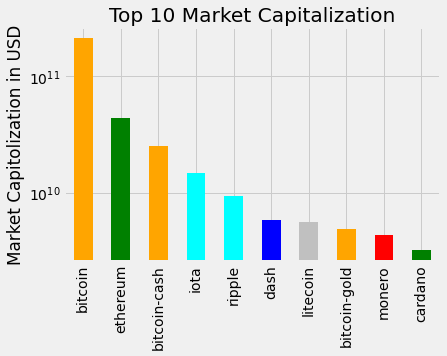

In [9]:
# Declare the y axis label
CAP_USD_YLABEL = "Market Capitolization in USD"

# Declare colors using cap position
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']

# Plot the data in USD using log for the y axis and colors for the bars
ax = cap10.market_cap_usd.plot.bar(logy = True, color = COLORS, title = CAP_TITLE)

# Set x and y labels
ax.set_ylabel(CAP_USD_YLABEL)
ax.set_xlabel("")

In [10]:
# Lets check the top 10 volumes
vol = dec6[['id', '24h_volume_usd']]

# Set index as id
vol = vol.set_index('id')

# check
vol.head()

,24h_volume_usd
id,
bitcoin,9.007640e+09
ethereum,1.551330e+09
bitcoin-cash,1.111350e+09
iota,2.936090e+09
ripple,2.315050e+08


In [11]:
# Sort by volume
vol = vol.sort_values("24h_volume_usd", ascending = False)

# Select the top 10
vol10 = vol[:10]
# check
vol.head()

,24h_volume_usd
id,
bitcoin,9.007640e+09
iota,2.936090e+09
ethereum,1.551330e+09
bitcoin-cash,1.111350e+09
tether,1.084790e+09


Text(0.5, 0, '')

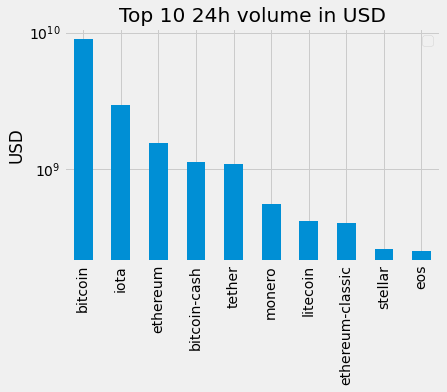

In [12]:
# Declare labels and titles
VOL_TITLE = "Top 10 24h volume in USD"
VOL_YLABEL = "USD"

# Plot
ax = vol10.plot.bar(title = VOL_TITLE, logy= True)
ax.set_ylabel(VOL_YLABEL)

# Remove legend and x label
ax.legend("")
ax.set_xlabel("")


On this day bitcoin was the cryptocurrency with the largest volume of trades, however the dollar amount of money changing hands was not as large as the difference in market capitalization. This has implications for volatility of a cryptocurrency. Could any of these most active or largest market cap cryptocurrencies be part of the most volatile for the day and week?

In [13]:
# Select the percent change columns
volatility = dec6[["id", "percent_change_24h", "percent_change_7d"]]

# Set index to id and na values
volatility = volatility.set_index("id").dropna()

# Sort values by 24h percent change in ascending order
volatility = volatility.sort_values("percent_change_24h", ascending = True)

# Check the first few rows
volatility.head()

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


Some coins have lost 95% of their value in 24h while others have gained hundreds of percents too. Lets see what are the extremes of 24 hours and then weekly volatility. Make a function to do the ploting of both figures. 

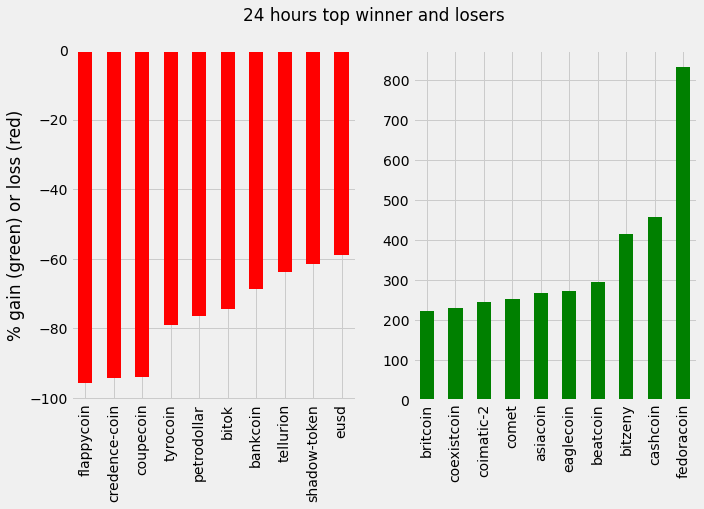

In [14]:
# Define a function that will make bar plots with 2 parameters, the series to plot and the title
def top10_subplot(volatility_series, title):
    # Define the plot figure and axes
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 6))
    
    # populate the first plot, loss, with red color
    ax = volatility_series[:10].plot.bar(color = "red", ax = axes[0])
    
    # set x and y labels
    ax.set_ylabel("% gain (green) or loss (red)")
    ax.set_xlabel("")
    
    # set the figure title
    fig.suptitle(title)
    
    # populate the second plot
    ax = volatility_series[-10:].plot.bar(color = "green", ax = axes[1])
    ax.set_xlabel("")

    
    # return the fig and ax for the two sets of volatility figures I wish to make
    return fig, ax
    
    # call function for 24 hour period series and name a title variable
FIG1TITLE = "24 hours top winner and losers"
fig, ax = top10_subplot(volatility.percent_change_24h, FIG1TITLE)


The 24h analysis shows that none of our top 10 market cap or top 10 volume in USD cryptocurrencies are among the most volatile on this day. Now to check if that observation holds true for the week.

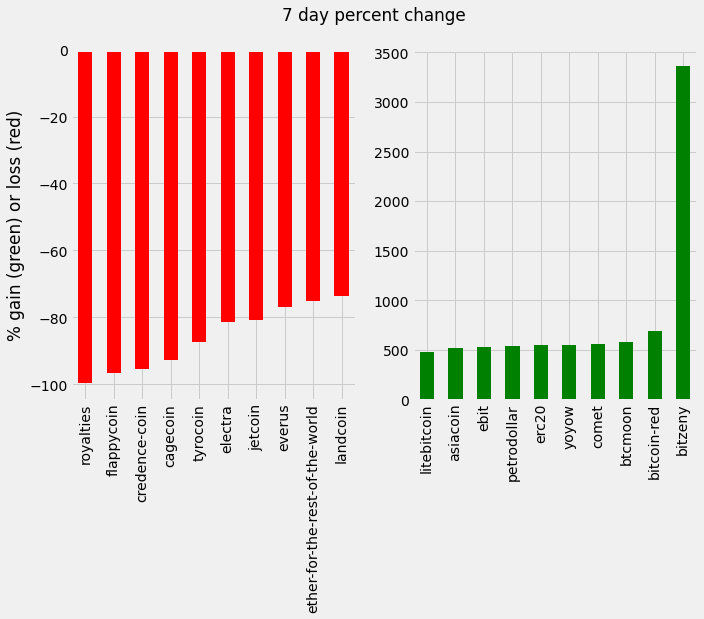

In [15]:
# Sort volatility by week in ascending order
volatility7d = volatility.sort_values("percent_change_7d", ascending = True)

# Check data
volatility.head()

# Define title
FIG2TITLE = "7 day percent change"

# Plot 7d percent change
fig, ax = top10_subplot(volatility7d.percent_change_7d, FIG2TITLE)

Again these cryptocurrencies are not part of the top 10 in market cap or volume usd. The amount of volatility is still quite large. Whoever was holding onto bitzeny should probably sell and then take a nice vacation. 

As with stocks, the cap of the coins may be indicative of their volatility. It would be good to catorgorize the coins and see if all of the most volatile coins are part of the lowest cap. 

In [16]:
# Grab the dataset
data_cat = dec6[["id", "market_cap_usd"]]

# Declare the market cap catagories
data_cat.head()

# Set index to id
data_cat = data_cat.set_index("id")

The data looks good. Now lets split it up into the categories. Here are the categories according to investopedia:
- large cap: +10 billion
- mid cap: 2 billion - 10 billion
- small cap: 300 million - 2 billion
- micro cap: 50 million - 300 million
- nano cap: below 50 million

Text(0, 0.5, 'cryptocurrency count')

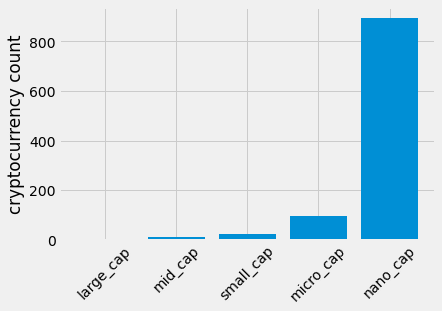

In [24]:
# categorize the data using a custom function
def capcount(CAP_QUERY):
    return data_cat.query(CAP_QUERY).count().market_cap_usd

# define the categories
large_cap = capcount('market_cap_usd > 1E+10')
mid_cap = capcount('market_cap_usd < 1E+10 & market_cap_usd > 2E+9')
small_cap = capcount('market_cap_usd < 2E+9 & market_cap_usd > 3E+8')
micro_cap = capcount('market_cap_usd < 3E+8 & market_cap_usd > 5E+7')
nano_cap = capcount('market_cap_usd < 5E+7')

# Set list of data for figure
values = [large_cap, mid_cap, small_cap, micro_cap, nano_cap]

# Set labels list for figure
CAP_LIST = ["large_cap", "mid_cap", "small_cap", "micro_cap", "nano_cap"]

# plot
plt.bar(range(len(values)), values, tick_label = CAP_LIST)
plt.xticks(rotation = 45)
plt.ylabel("cryptocurrency count")

There are a lot of nano cap cryptocurrencies, how many large caps are there exactly?

In [29]:
large_cap

4

In [34]:
cnt_large_cap = data_cat.query("market_cap_usd > 1E+10")
cnt_large_cap

,market_cap_usd
id,
bitcoin,2.130493e+11
ethereum,4.352945e+10
bitcoin-cash,2.529585e+10
iota,1.475225e+10


There are 4 large cap coins. These are also the 4 largest in terms of market cap that we saw from the first figure. What is the sum of the large cap currencies.

In [35]:
cnt_large_cap.sum()

market_cap_usd    2.966269e+11
dtype: float64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

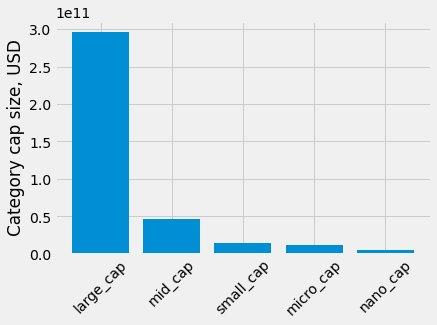

In [89]:
def Catcap(query_string):
    return data_cat.query(query_string).sum().market_cap_usd

# Calculate the sum categories
large_sum = Catcap('market_cap_usd > 1E+10')
mid_sum = Catcap('market_cap_usd < 1E+10 & market_cap_usd > 2E+9')
small_sum = Catcap('market_cap_usd < 2E+9 & market_cap_usd > 3E+8')
micro_sum = Catcap('market_cap_usd < 3E+8 & market_cap_usd > 5E+7')
nano_sum = Catcap('market_cap_usd < 5E+7')

# Make the list of the categories
sum_values = [large_sum, mid_sum, small_sum, micro_sum, nano_sum]

# names list
sum_cap_list = ["large_cap", "mid_cap", "small_cap", "micro_cap", "nano_cap"]

sum_values
plt.bar(range(len(sum_values)), sum_values, tick_label = sum_cap_list)
plt.ylabel("Category cap size, USD")
plt.xticks(rotation = 45)


In [84]:
for i in sum_dict:
    print(i, ":", sum_dict[i])

large_cap : 296626891496.0
mid_cap : 46155153866.0
small_cap : 14577617315.0
micro_cap : 11698106469.0
nano_cap : 5247098396.0


The four largest cryptocurrencies make up the vast majority of the entire bitcoin market, the trade volume, and are the most stable. The nano_cap currencies are among the least stable and they make up a very small amount of trades. 